In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
# skiprows: 시작(1)부터 n번 줄까지 제외, 바꿔 설명하면 b번 줄부터 시작
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
tmp = pd.read_csv(data_url, sep='adswqdas', skiprows=7, nrows=13, header=None)
# sep는 구분자가 없어 모두 갖고 오도록 임의 기재, nrows: 시작부터 n번까지만 반환(지금은 7:20(20제외))
feature_names = [tmp.iloc[i,0].split()[0] for i in range(len(tmp))]
target = raw_df.values[1::2, 2]

boston_pd = pd.DataFrame(boston, columns=feature_names)
boston_pd['PRICE']=target
boston_pd.head()

C:\Users\why\AppData\Local\Temp\ipykernel_1440\928257652.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(data_url, sep='adswqdas', skiprows=7, nrows=13, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


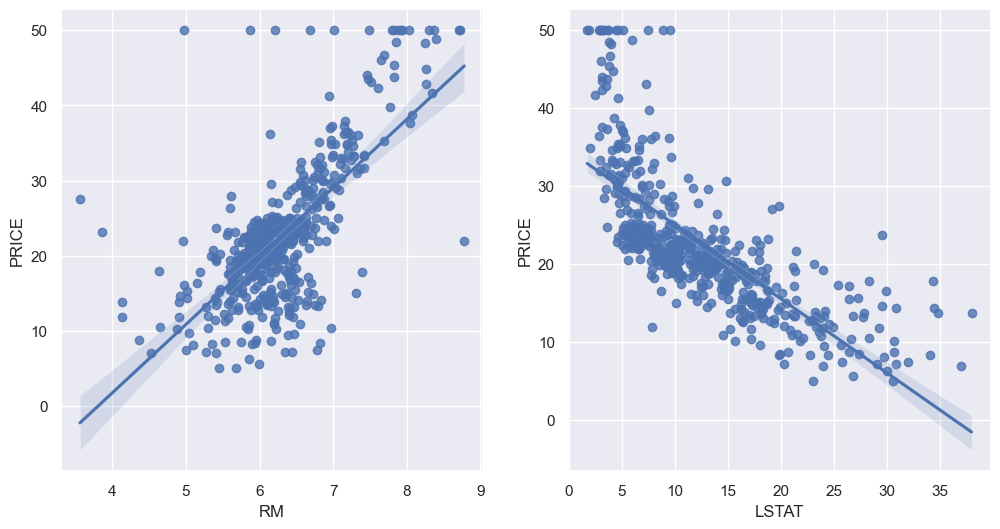

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(1,2)
sns.regplot(x='RM',y='PRICE',data=boston_pd,ax=ax[0])
sns.regplot(x='LSTAT',y='PRICE',data=boston_pd,ax=ax[1]);

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression		# 선형 회귀. OLS 사용.
from sklearn.metrics import mean_squared_error

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
# np.sqrt: 제곱근 구하기(루트 씌우기), mean_squared_error(실제값, 예측값): 평균제곱오차(작을수록 좋음)
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
# 위 식 = mean_squared_error(y_test,pred_test)**0.5 = mean_squared_error(y_test,pred_test,squared=False)

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.642806069019824
RMSE of Test Data:  4.931352584146716


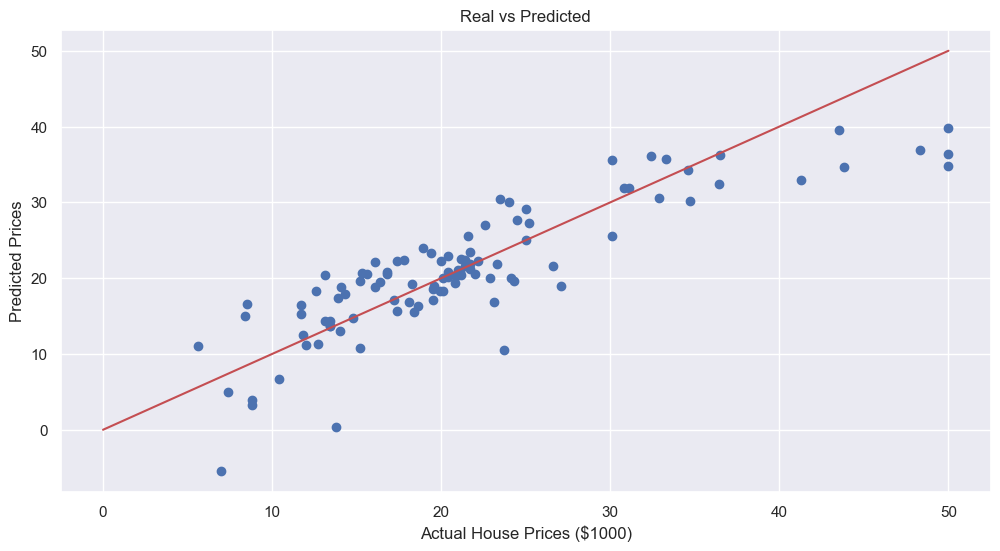

In [4]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0,50],[0,50],'r')		# 이 선에 가까울수록 실제값(y_test)과 예측값(pred_test)이 일치
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                        0.00
Time:                        17:30:07   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

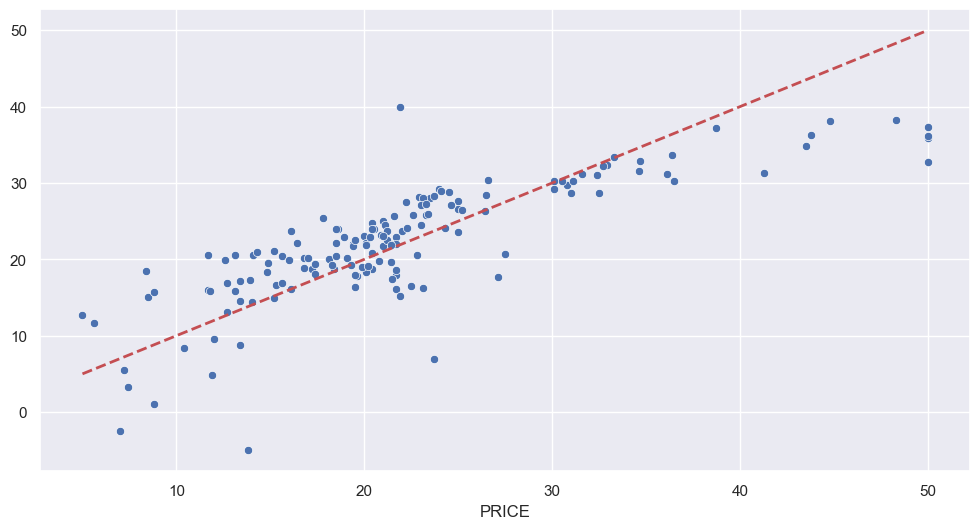

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = boston_pd[['RM', 'LSTAT']]
y = boston_pd['PRICE']
lm = sm.OLS(y, X).fit()
print(lm.summary())	

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=13)
lm = sm.OLS(y_train, X_train).fit()
pred = lm.predict(X_test)
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2)
plt.show()